### Import Libraries

In [235]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime # used for feature engineering to calculate house age

# import preprocessing tools
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# import regression models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# import model evaluation and selection tools
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib # to save the model

### Load Data

In [236]:
data = pd.read_csv('data.csv')
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [237]:
# Basic checking for duplicate rows and null values
print(f"Duplicate rows: {data.duplicated().sum()}")
print(f"Null values:\n{data.isnull().sum()}")

Duplicate rows: 0
Null values:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


### Exploratory Data Analysis (EDA)

In [238]:
data.shape

(4600, 18)

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [240]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [241]:
# Extract year from date column
year_sold = pd.to_datetime(data['date']).dt.year
year_sold.value_counts()

date
2014    4600
Name: count, dtype: int64

In [242]:
numeric_cols = data.select_dtypes(include='number').columns
numeric_cols

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

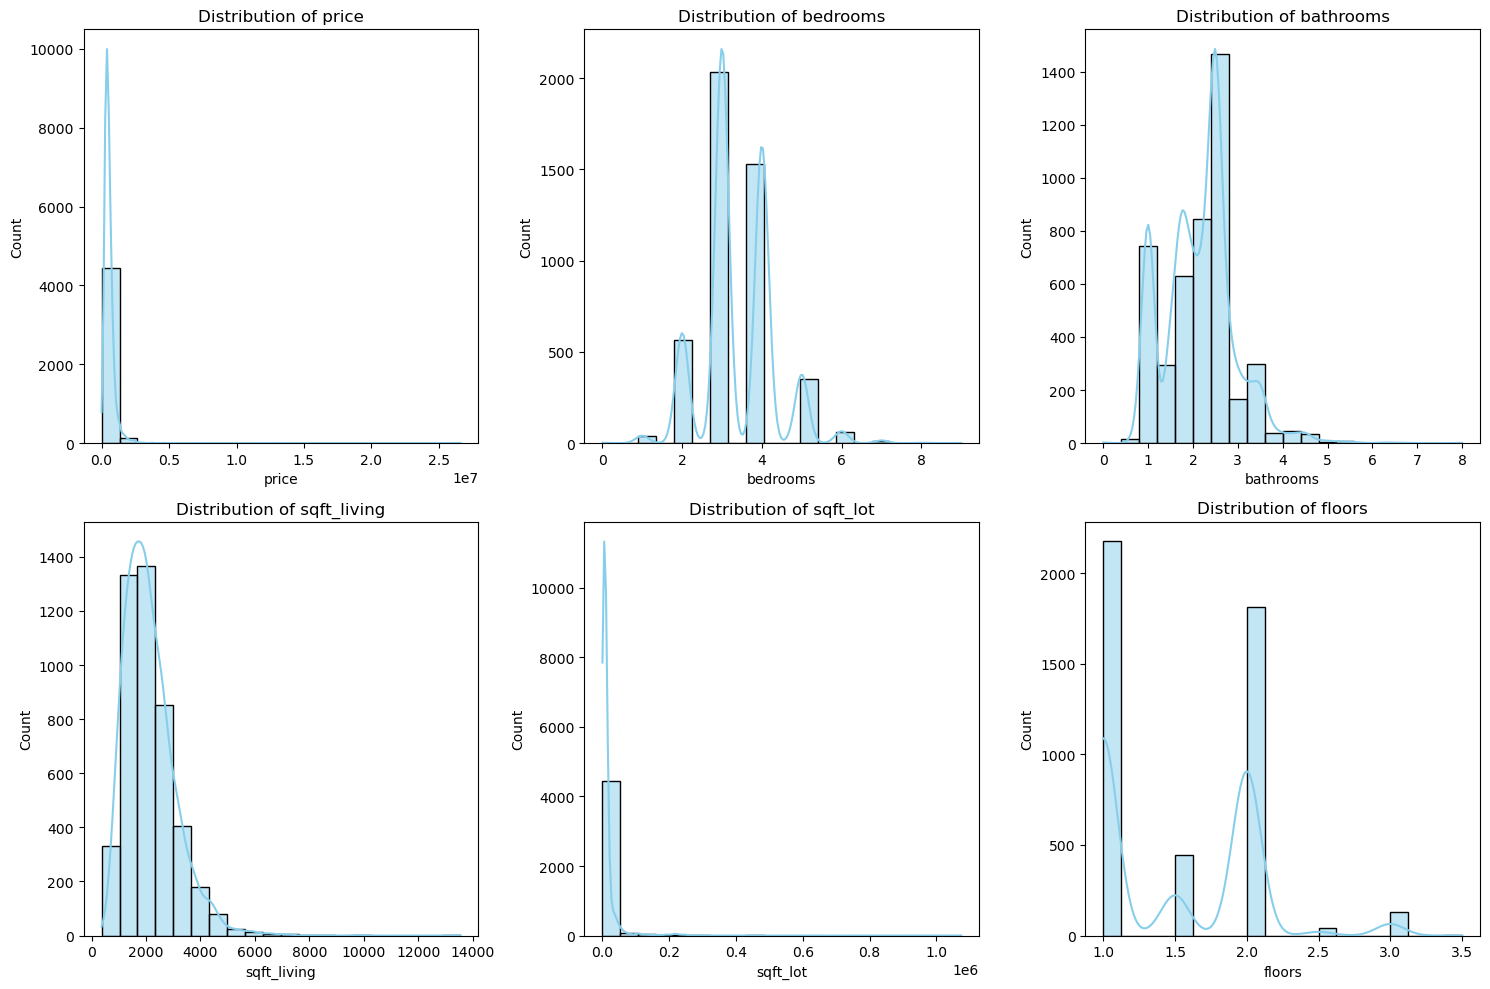

In [243]:
# Plot histograms for numeric columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols[:6], 1):
    plt.subplot(2,3,i)
    sns.histplot(data[col], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

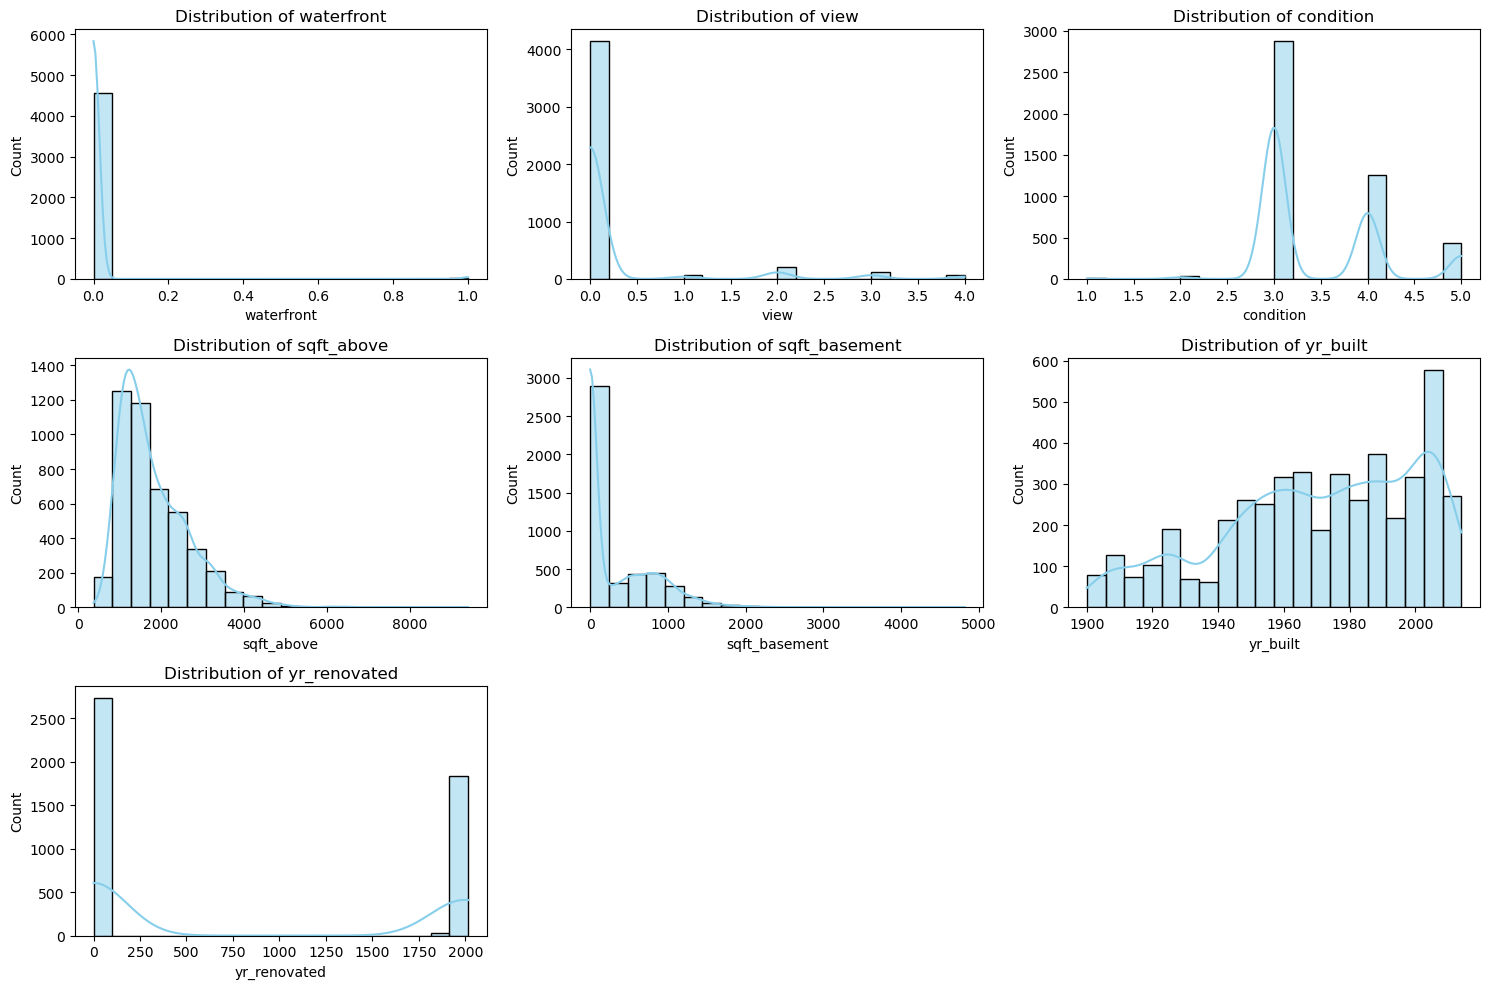

In [244]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols[6:], 1):
    plt.subplot(3,3,i)
    sns.histplot(data[col], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

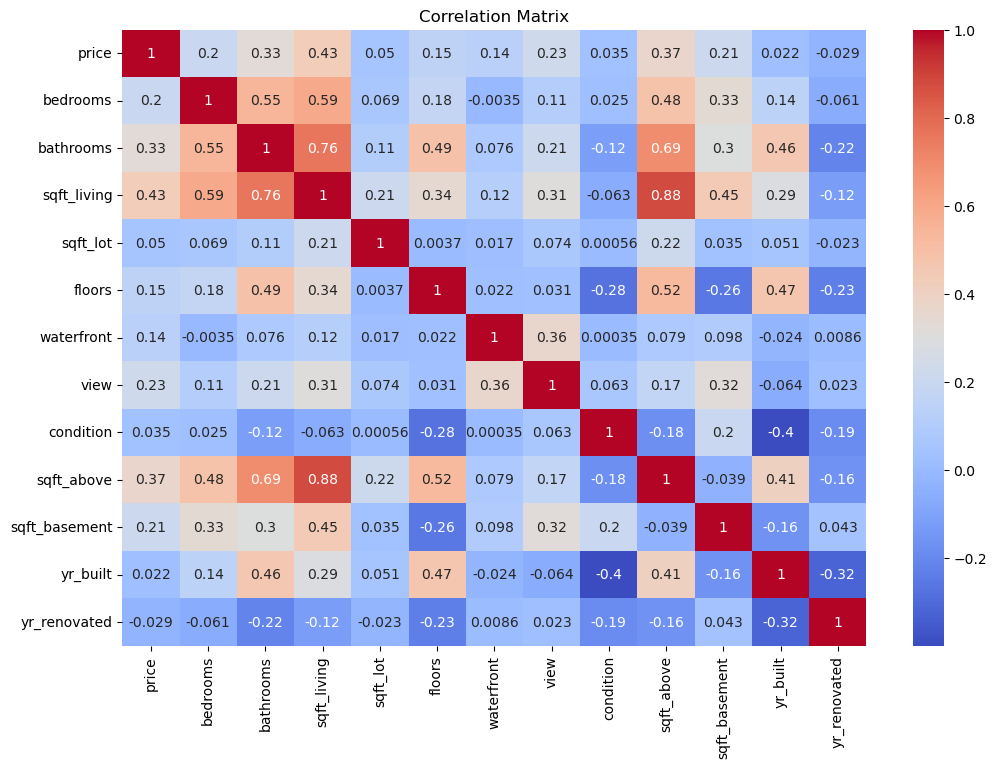

In [245]:
# Colleration matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Feature Engineering

In [246]:
# new column 'age' to indicate the house age instead of the house built year
data['house_age'] = datetime.datetime.now().year - data['yr_built']
data.drop(columns='yr_built', inplace=True)

# new column 'renovated' to indicate whether the house has been renovated or not
data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
data.drop(columns='yr_renovated', inplace=True)

In [247]:
# Price per living square feet
data['price_per_sqft_living'] = data['price'] / data['sqft_living']
print(data.price_per_sqft_living.describe())

# Binning price_per_sqft_living into intervals of 50
data['price_bin'] = (data['price_per_sqft_living'] // 50) * 50
data['price_bin'].value_counts().sort_index()

count     4600.000000
mean       265.876260
std        357.503344
min          0.000000
25%        180.819021
50%        243.853874
75%        314.843619
max      22533.898305
Name: price_per_sqft_living, dtype: float64


price_bin
0.0         52
50.0        51
100.0      526
150.0      853
200.0      924
250.0      842
300.0      540
350.0      341
400.0      200
450.0      115
500.0       62
550.0       40
600.0       22
650.0       16
700.0        9
750.0        1
800.0        1
1000.0       1
1450.0       1
1950.0       1
5850.0       1
22500.0      1
Name: count, dtype: int64

In [248]:
# Mean and median price_per_sqft_living
mean_price_per_sqft = data['price_per_sqft_living'].mean()
median_price_per_sqft = data['price_per_sqft_living'].median()

# Outliers detection using 1st and 99th percentiles
lower_bound = data['price_per_sqft_living'].quantile(0.01)
upper_bound = data['price_per_sqft_living'].quantile(0.99)

print(f"Mean price per sqft living: {mean_price_per_sqft}")
print(f"Median price per sqft living: {median_price_per_sqft}")
print(f"Lower bound (1st percentile): {lower_bound}")
print(f"Upper bound (99th percentile): {upper_bound}")

Mean price per sqft living: 265.87625997841366
Median price per sqft living: 243.85387437945178
Lower bound (1st percentile): 0.0
Upper bound (99th percentile): 618.4462377420167


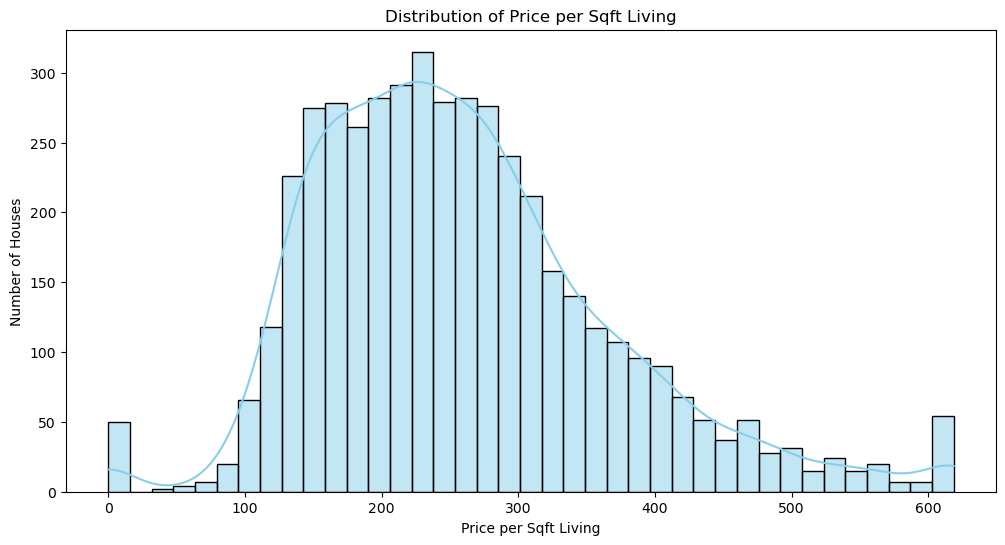

In [249]:
# Clip the price_per_sqft_living to the upper bound 99th percentile for better visualization
data['price_per_sqft_living'] = data['price_per_sqft_living'].clip(upper=upper_bound)

# Histogram of price_per_sqft_living after clipping
plt.figure(figsize=(12, 6))
sns.histplot(data['price_per_sqft_living'], kde=True, color='skyblue')
plt.title('Distribution of Price per Sqft Living')
plt.xlabel('Price per Sqft Living')
plt.ylabel('Number of Houses')
plt.show()

In [250]:
# Drop outliers 1st and 99th percentiles
outlier_removed_df = data[(data['price_per_sqft_living'] > lower_bound) & (data['price_per_sqft_living'] < upper_bound)].copy()
print(f"Data shape before outlier removal: {data.shape}")
print(f"Data shape after outlier removal: {outlier_removed_df.shape}")

Data shape before outlier removal: (4600, 20)
Data shape after outlier removal: (4505, 20)


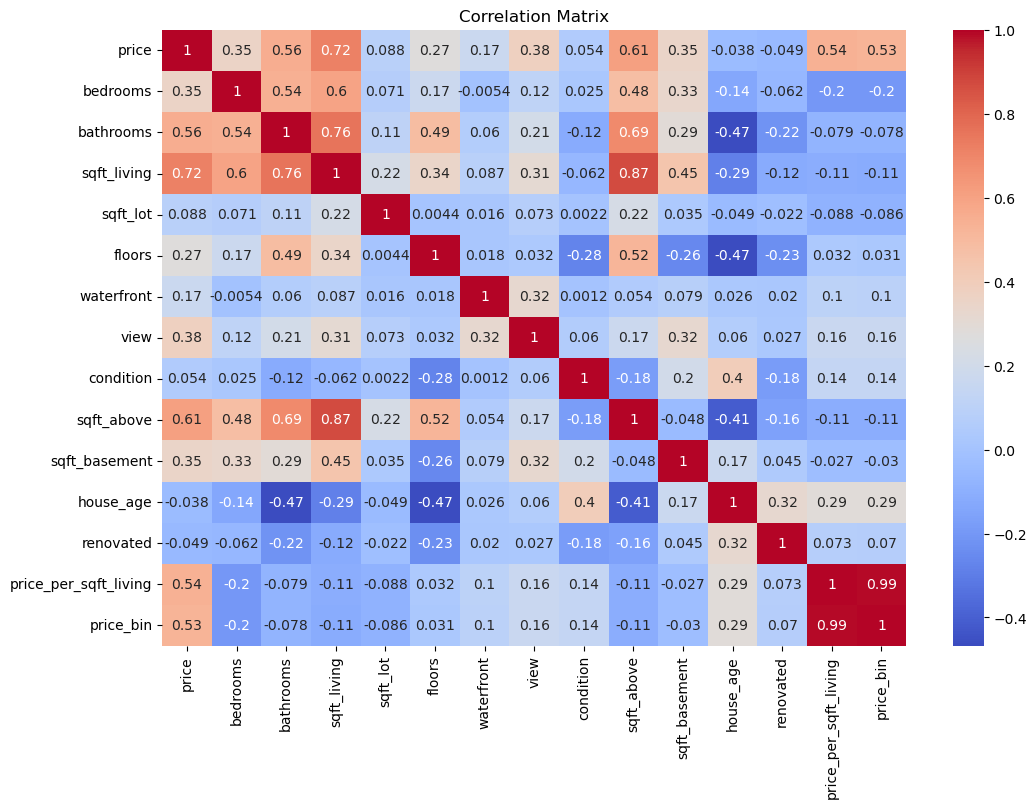

In [251]:
# Correlation matrix to see the effect of outlier removal
plt.figure(figsize=(12, 8))
sns.heatmap(outlier_removed_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

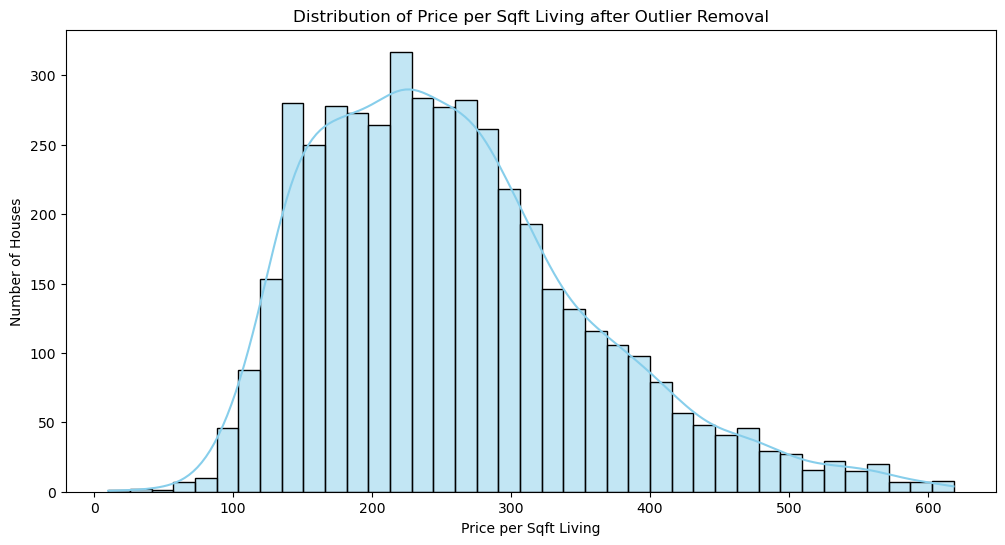

In [252]:
# Histogram of price_per_sqft_living after outlier removal
plt.figure(figsize=(12, 6))
sns.histplot(outlier_removed_df['price_per_sqft_living'], kde=True, color='skyblue')
plt.title('Distribution of Price per Sqft Living after Outlier Removal')
plt.xlabel('Price per Sqft Living')
plt.ylabel('Number of Houses')
plt.show()

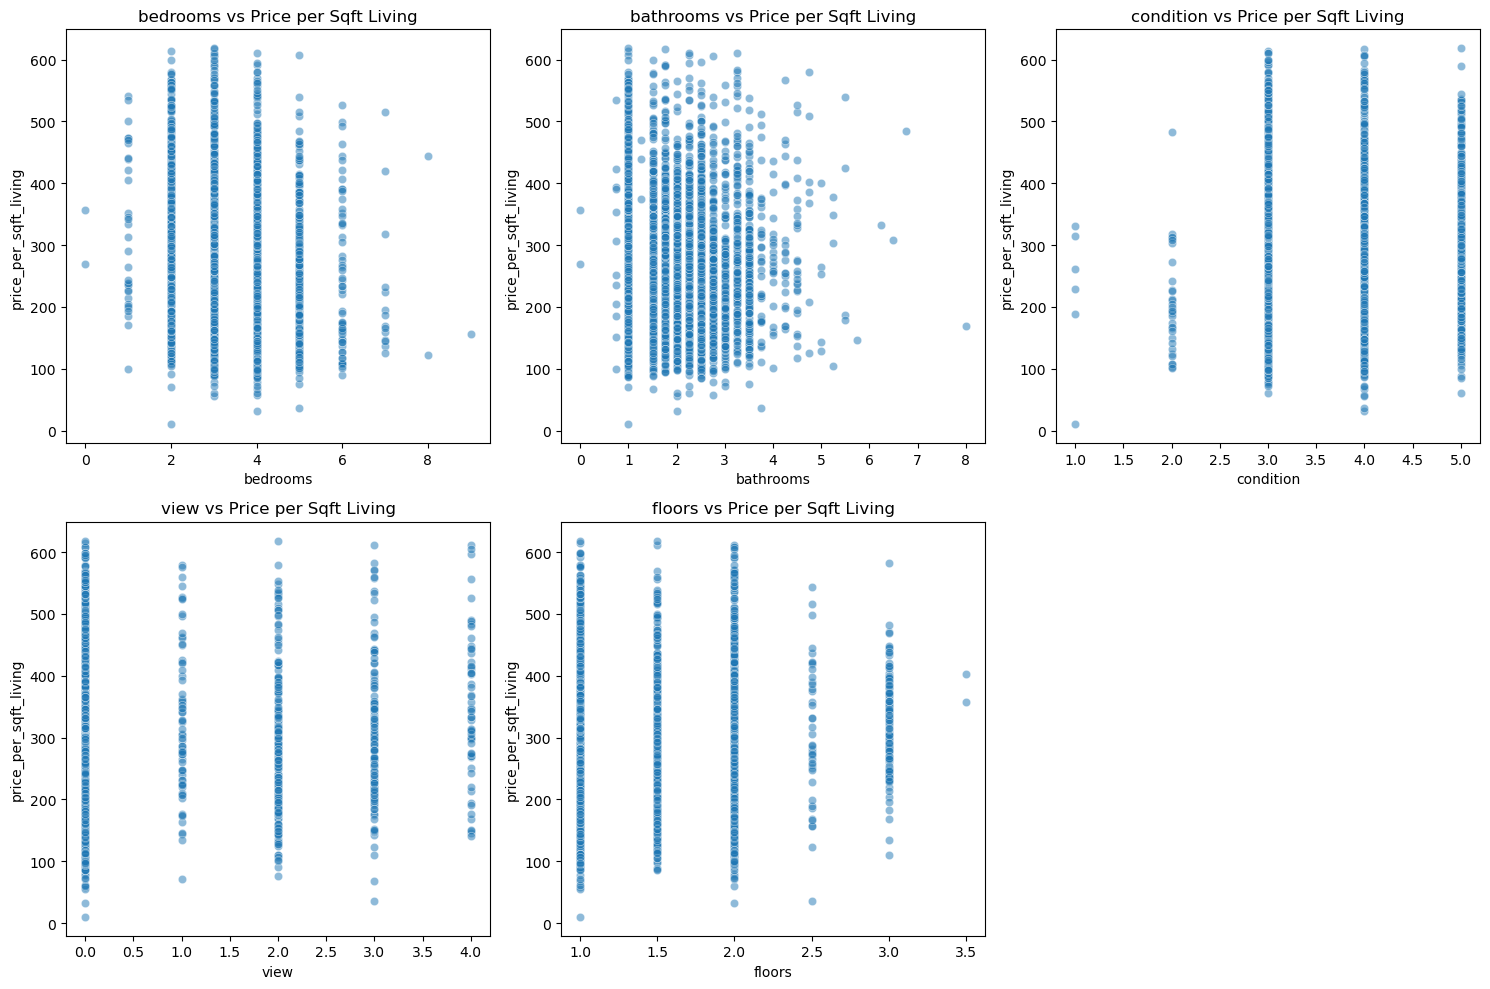

In [253]:
# Scatter plot multiple features vs price_per_sqft_living
plt.figure(figsize=(15, 10))
features = ['bedrooms', 'bathrooms', 'condition', 'view', 'floors']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=outlier_removed_df[feature], y=outlier_removed_df['price_per_sqft_living'], alpha=0.5)
    plt.title(f'{feature} vs Price per Sqft Living')
plt.tight_layout()
plt.show()

In [254]:
print(outlier_removed_df.bathrooms.value_counts())

bathrooms
2.50    1177
1.00     722
1.75     624
2.00     421
2.25     410
1.50     285
2.75     270
3.00     162
3.50     158
3.25     133
3.75      34
4.50      25
4.25      21
4.00      21
0.75      12
4.75       7
5.00       5
5.25       4
5.50       4
1.25       3
0.00       2
8.00       1
5.75       1
6.50       1
6.25       1
6.75       1
Name: count, dtype: int64


In [255]:
# remove rows which bedrooms and bathrooms are 0
outlier_removed_df = outlier_removed_df[(outlier_removed_df['bedrooms'] > 0) & (outlier_removed_df['bathrooms'] > 0)]

# remove rows which condition is 1.0
outlier_removed_df = outlier_removed_df[outlier_removed_df['condition'] != 1.0]

# remove rows which floors is 3.5
outlier_removed_df = outlier_removed_df[outlier_removed_df['floors'] != 3.5]

In [256]:
# Change the data types of bathrooms, bedrooms and floors
outlier_removed_df['bathrooms'] = outlier_removed_df['bathrooms'].astype(int)
outlier_removed_df['bedrooms'] = outlier_removed_df['bedrooms'].astype(int)
outlier_removed_df['floors'] = outlier_removed_df['floors'].astype(int)

In [258]:
# Average house price per city
avg_price_per_city = outlier_removed_df.groupby('city')['price'].mean().sort_values(ascending=False)

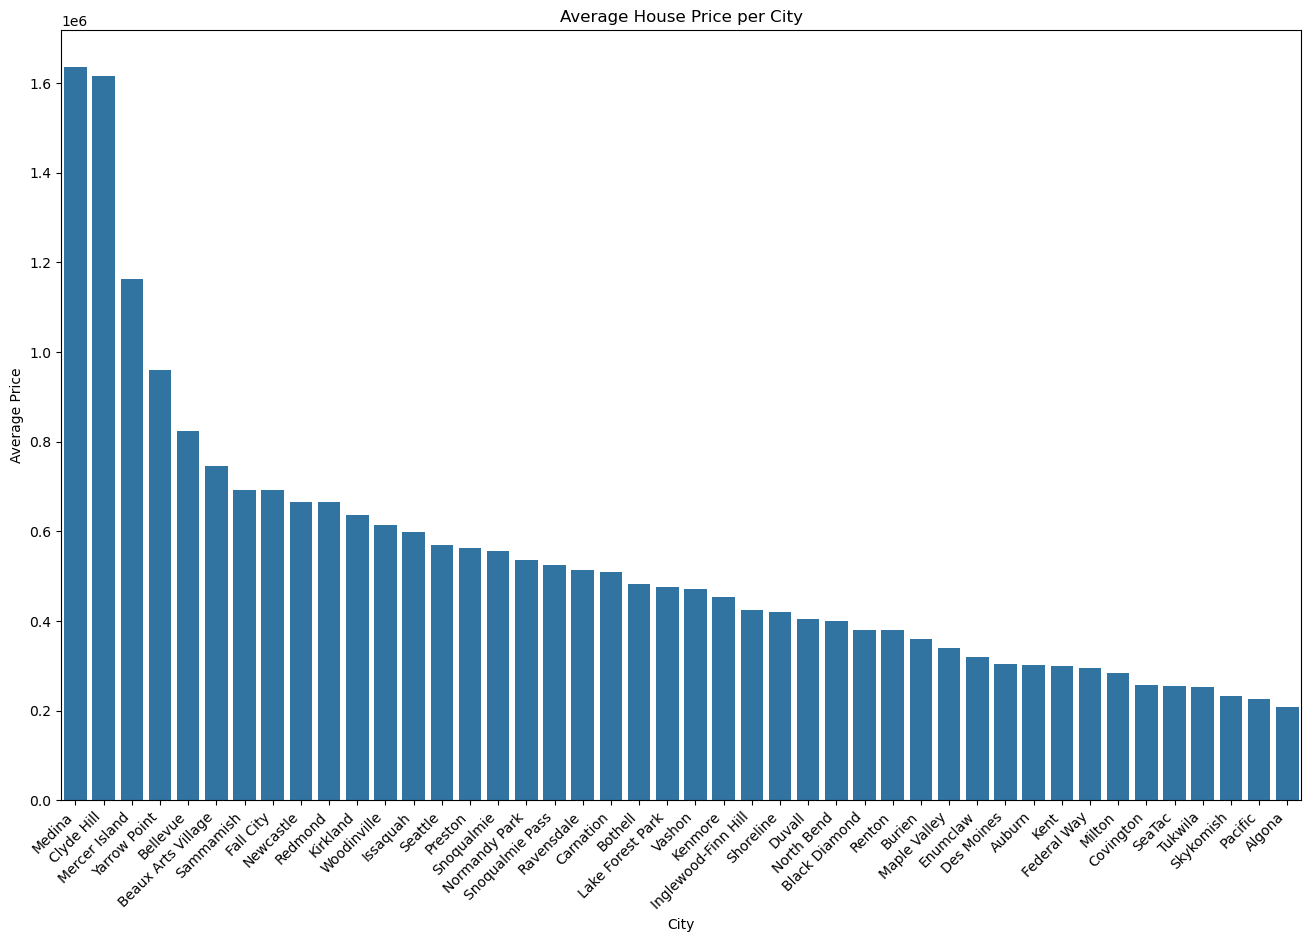

In [259]:
# Plot average house price per city
plt.figure(figsize=(16, 10))
sns.barplot(x=avg_price_per_city.index, y=avg_price_per_city.values)
plt.title('Average House Price per City')
plt.xlabel('City')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Average Price')
plt.show()

In [260]:
# Encode 'city' column using one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
city_encoded = encoder.fit_transform(outlier_removed_df[["city"]])
city_df = pd.DataFrame(city_encoded, columns=encoder.get_feature_names_out(["city"]))
city_df

,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4492,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [261]:
# Concatenate the one-hot encoded city columns to the main dataframe
city_df.index = outlier_removed_df.index
concatenated_df = pd.concat([outlier_removed_df, city_df], axis=1)
concatenated_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,2014-05-02 00:00:00,313000.000000,3,1,1340,7912,1,0,0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-05-02 00:00:00,342000.000000,3,2,1930,11947,1,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-05-02 00:00:00,420000.000000,3,2,2000,8030,1,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-05-02 00:00:00,550000.000000,4,2,1940,10500,1,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2014-05-02 00:00:00,490000.000000,2,1,880,6380,1,0,0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.666667,3,1,1510,6360,1,0,0,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4596,2014-07-09 00:00:00,534333.333333,3,2,1460,7573,2,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4597,2014-07-09 00:00:00,416904.166667,3,2,3010,7014,2,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4598,2014-07-10 00:00:00,203400.000000,4,2,2090,6630,1,0,0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [262]:
concatenated_df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'street', 'city', 'statezip', 'country', 'house_age',
       'renovated', 'price_per_sqft_living', 'price_bin', 'city_Auburn',
       'city_Beaux Arts Village', 'city_Bellevue', 'city_Black Diamond',
       'city_Bothell', 'city_Burien', 'city_Carnation', 'city_Clyde Hill',
       'city_Covington', 'city_Des Moines', 'city_Duvall', 'city_Enumclaw',
       'city_Fall City', 'city_Federal Way', 'city_Inglewood-Finn Hill',
       'city_Issaquah', 'city_Kenmore', 'city_Kent', 'city_Kirkland',
       'city_Lake Forest Park', 'city_Maple Valley', 'city_Medina',
       'city_Mercer Island', 'city_Milton', 'city_Newcastle',
       'city_Normandy Park', 'city_North Bend', 'city_Pacific', 'city_Preston',
       'city_Ravensdale', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_SeaTac', 'city_Seattle', 'city_Shoreline',

In [263]:
# Drop irrelevant columns
cols_to_drop = ['date', 'city', 'country', 'street', 'statezip', 'price_per_sqft_living', 'price_bin']
cleaned_df = concatenated_df.drop(columns=cols_to_drop)

### Model Training

In [264]:
# Split dataset into training and testing sets
x = cleaned_df.drop(columns='price')
y = cleaned_df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape}")
print(f"Testing set size: {x_test.shape}")

Training set size: (3596, 55)
Testing set size: (900, 55)


In [265]:
# Linear Regression Model
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

train_score = model_LR.score(x_train, y_train)
test_score = model_LR.score(x_test, y_test)

print(f"Train R²: {train_score:.4f}")
print(f"Test R²: {test_score:.4f}")

Train R²: 0.7293
Test R²: 0.7273


In [266]:
# Cross validation using shuffle split
sscv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores = cross_val_score(model_LR, x, y, cv=sscv)

print(f"Scores: {scores}")
print(f"Average score: {scores.mean():.4f}")

Scores: [0.72733238 0.69787144 0.69004507 0.72111005 0.72577029]
Average score: 0.7124


In [267]:
# Cross validation using k-fold
kfcv = KFold(n_splits=5, shuffle=True, random_state=42)
kfcv_scores = cross_val_score(model_LR, x, y, cv=kfcv)

print(f"Scores: {kfcv_scores}")
print(f"Average score: {kfcv_scores.mean():.4f}")

Scores: [0.72733238 0.72914059 0.7225221  0.6842721  0.70747204]
Average score: 0.7141


In [268]:
# Predictions on training and testing sets
y_train_pred = model_LR.predict(x_train)
y_test_pred = model_LR.predict(x_test)

In [269]:
# Training set and test set evaluation
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("=== Training Data Evaluation ===")
print(f"MAE: {train_mae:.4f}")
print(f"MSE: {train_mse:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"R²: {train_r2:.4f}")

print("\n=== Test Data Evaluation ===")
print(f"MAE: {test_mae:.4f}")
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²: {test_r2:.4f}")

=== Training Data Evaluation ===
MAE: 113163.9479
MSE: 30699170404.8462
RMSE: 175211.7873
R²: 0.7293

=== Test Data Evaluation ===
MAE: 110785.6759
MSE: 26837380833.0898
RMSE: 163821.1855
R²: 0.7273


In [270]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# function to perform model selection
def model_selection(models, x_train, y_train, x_test, y_test):
    results = {}
    for name, model in models.items():
        if name == 'KNN':
            scaler = StandardScaler()
            x_train_scaled = scaler.fit_transform(x_train)
            x_test_scaled = scaler.transform(x_test)
            model.fit(x_train_scaled, y_train)
            y_pred = model.predict(x_test_scaled)
        else:
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        results[name] = {
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R²': r2
        }
    return pd.DataFrame(results).T
results_df = model_selection(models, x_train, y_train, x_test, y_test)
results_df

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.519e+13, tolerance: 4.078e+10
  model = cd_fast.enet_coordinate_descent(


,MAE,MSE,RMSE,R²
Linear Regression,110785.675864,2.683738e+10,163821.185544,0.727332
Ridge,110688.448286,2.669859e+10,163397.029512,0.728743
Lasso,110793.714229,2.683536e+10,163815.024043,0.727353
Random Forest,101693.679296,2.722262e+10,164992.783744,0.723418
SVR,215537.847705,1.026586e+11,320403.851970,-0.043011
KNN,107811.753429,3.031998e+10,174126.334943,0.691949
Decision Tree,132391.016565,5.125549e+10,226396.760205,0.479245


In [271]:
# function to hyperparameters tuning using GridSearchCV for top 3 models Linear Regression, Ridge and Lasso
top3_models = {
    'Linear Regression': {
        'fit_intercept': [True, False]
    },
    'Ridge': {
        'alpha': [1, 2, 5],
        'fit_intercept': [True, False],
        'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    },
    'Lasso': {
        'alpha': [150, 200, 250],
        'max_iter': [2000, 2500, 3000],
        'selection': ['cyclic', 'random']
    }
}

def hyperparameter_tuning(model_name, model, param_grid, x_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(x_train, y_train)

    print(f"Best estimator for {model_name}: {grid_search.best_estimator_}")
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {-grid_search.best_score_}")
    print("\n")

for name, params in top3_models.items():
    hyperparameter_tuning(name, models[name], params, x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best estimator for Linear Regression: LinearRegression()
Best parameters for Linear Regression: {'fit_intercept': True}
Best score for Linear Regression: 33249556692.33797


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best estimator for Ridge: Ridge(alpha=2, solver='cholesky')
Best parameters for Ridge: {'alpha': 2, 'fit_intercept': True, 'solver': 'cholesky'}
Best score for Ridge: 32657585230.796703


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best estimator for Lasso: Lasso(alpha=200, max_iter=2500, selection='random')
Best parameters for Lasso: {'alpha': 200, 'max_iter': 2500, 'selection': 'random'}
Best score for Lasso: 32798492784.71593




In [272]:
# function to train and evaluate the best model
def train_and_evaluate_best_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print("=== Best Model Evaluation ===")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")

final_model = Ridge(alpha=2, fit_intercept=True, solver='svd')
train_and_evaluate_best_model(final_model, x_train, y_train, x_test, y_test)

=== Best Model Evaluation ===
MAE: 110593.0374
MSE: 26626825375.6809
RMSE: 163177.2820
R²: 0.7295


In [273]:
# default input for prediction
# mode for bedrooms, bathrooms, condition, view, floors, waterfront, renovated, city
# mean for sqft_living, sqft_lot, house_age
mode_columns = ["bedrooms", "bathrooms", "condition", "view", "floors", "waterfront", "renovated"]
mean_columns = ["sqft_living", "sqft_lot", "sqft_basement", "sqft_above", "house_age"]

default_input = {}
for col in mode_columns:
    default_input[col] = x[col].mode()[0]
for col in mean_columns:
    default_input[col] = round(x[col].mean(), 2)

default_city = data['city'].mode()[0]

In [274]:
# save the best model using joblib
artifact = {
    "model": final_model,
    "features": x.columns.tolist(),
    "city_columns": [col for col in x.columns if col.startswith('city_')],
    "non_city_columns": [col for col in x.columns if not col.startswith('city_')],
    "default_values": default_input,
    "default_city": outlier_removed_df['city'].mode()[0]
}

joblib.dump(artifact, 'house_price_prediction_model.pkl')

['house_price_prediction_model.pkl']

### Model Prediction

In [282]:
class HousePricePredictor:
    def __init__(self, model_path='house_price_prediction_model.pkl'):
        self.artifact = joblib.load(model_path)
        self.model = self.artifact['model']
        self.features = self.artifact['features']
        self.city_columns = self.artifact['city_columns']
        self.non_city_columns = self.artifact['non_city_columns']
        self.default_values = self.artifact['default_values']
        self.default_city = self.artifact['default_city']
    
    def prepare_input(self, input_data):
        # Create a DataFrame with all columns initialized
        input_df = pd.DataFrame(columns=self.features)

        # Fill non-city columns with input data or default values
        for col in self.non_city_columns:
            if col in input_data:
                input_df.at[0, col] = input_data[col]
            else:
                input_df.at[0, col] = self.artifact['default_values'][col]
        
        # Fill city columns with input data or default city
        for col in self.city_columns:
            input_df.at[0, col] = 0
        city_col_name = f"city_{input_data.get('city', self.artifact['default_city'])}"
        if city_col_name in self.city_columns:
            input_df.at[0, city_col_name] = 1
        
        return input_df

    def predict(self, input_data):
        input_df = self.prepare_input(input_data)
        prediction = self.model.predict(input_df)
        return prediction[0]

In [ ]:
predictor = HousePricePredictor()

In [ ]:
# example usage
input_data = {
    'bedrooms': 5,
    'bathrooms': 3,
    'sqft_living': 2000,
    'city': 'Kent'
}
predicted_price = predictor.predict(input_data)
print(f"Predicted house price: ${predicted_price:,.2f}")

Predicted house price: $356,407.04


In [292]:
# top 5 important features which is not city columns
importances = final_model.coef_
feature_importance = pd.Series(importances, index=x.columns).sort_values(ascending=False)
top5_features = feature_importance[feature_importance.index.str.startswith('city_') == False]
top5_features

waterfront       304755.132411
view              60426.670393
bathrooms         39945.053006
condition         34269.878241
floors            20164.237848
house_age          1220.155881
sqft_living         142.622614
sqft_above          103.702715
sqft_basement        38.919793
sqft_lot             -0.217976
renovated          -678.496109
bedrooms         -29329.704025
dtype: float64